In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

Набор данных - список пассажиров Титаника. Признаки: 
- пол
- возраст
- класс (upper, middle, lower)
- стоимость проезда
- число членов семьи на борту
- женат/не женат/замужем/не замужем
- порт, в котором была осуществлена посадка.

Пытаемся определить, выжил ли человек или нет (задача классификации).

Считываем тренировочные и тестовые данные.

In [2]:
data_train = pd.read_csv('./titanic/train_data.csv', sep = ',', engine = 'python')
data_test = pd.read_csv('./titanic/test_data.csv', sep = ',', engine = 'python')

In [3]:
data_train

,,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,788,0,1,0.1000,0.056848,0,0,1,0.5,0,0,1,0,0,1,0
788,788,789,1,1,0.0125,0.040160,0,0,1,0.3,0,0,1,0,0,0,1
789,789,790,0,1,0.5750,0.154588,1,0,0,0.0,1,0,0,0,1,0,0
790,790,791,0,1,0.3500,0.015127,0,0,1,0.0,1,0,0,0,0,1,0


Можно видеть, что datset уже частично обработан, т.е.
1. вещественные признаки в dataset нормализованы;
2. категориальные признаки векторизированы;
3. пропущенные значения заполнены медианой значений столбца;
4. значения бинарных признаков переведены в 0 или 1.

Информация для последующего анализа:
1. Столбцы Pclass_1..Pclass3 соответствуют классу (upper, middle, lower соответственно);
2. Столбцы Title_1..Title_4 соответствуют тому, женат/замужем ли пассажир или нет (Mr, Mrs, Master, Miss);
3. Столбцы Emb_1..Emb_3 соответствуют порту, в котором была осуществлена посадка (Cherbourg, Queenstown, Southampton);
4. Пол: 0 - мужчины, 1 - женщины.

Можно попробовать построить попарные матрицы разброса некоторых признаков, а также посмотреть значения некоторых эмперических характеристик выборки. Однако какие-либо значимые выводы касательно зависимости выживаемости от значений признаков сделать затруднительно (особенно для данного уже частично обработанного dataset). 

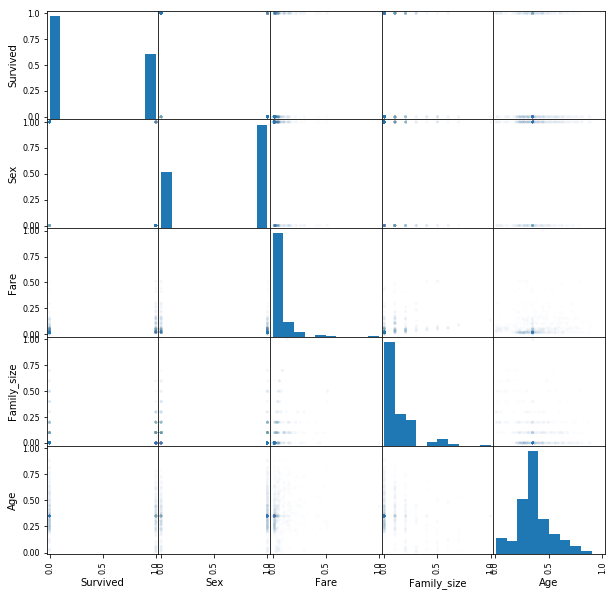

In [4]:
data_plot = data_train[['Survived', 'Sex', 'Fare', 'Family_size', 'Age']]
sm = pd.plotting.scatter_matrix(data_plot, alpha = .01, figsize = (10, 10))

In [5]:
data_train.describe()

,,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,395.500000,396.500000,0.386364,0.647727,0.368244,0.064677,0.243687,0.208333,0.547980,0.088636,0.744949,0.005051,0.040404,0.209596,0.185606,0.092172,0.720960
std,228.774999,228.774999,0.487223,0.477980,0.162994,0.100987,0.429577,0.406373,0.498007,0.154485,0.436165,0.070932,0.197029,0.407277,0.389034,0.289451,0.448811
min,0.000000,1.000000,0.000000,0.000000,0.008375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,197.750000,198.750000,0.000000,0.000000,0.275000,0.015469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,395.500000,396.500000,0.000000,1.000000,0.350000,0.028302,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,593.250000,594.250000,1.000000,1.000000,0.437500,0.061045,0.000000,0.000000,1.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,791.000000,792.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Поскольку вся работа по обработке данных уже проделана, переходим к решению задачи.

Готовим тренировочные данные.

In [6]:
X_train = data_train.drop(('Survived'), axis = 1)
y_train = data_train['Survived']

In [7]:
X_train

,,PassengerId,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,788,1,0.1000,0.056848,0,0,1,0.5,0,0,1,0,0,1,0
788,788,789,1,0.0125,0.040160,0,0,1,0.3,0,0,1,0,0,0,1
789,789,790,1,0.5750,0.154588,1,0,0,0.0,1,0,0,0,1,0,0
790,790,791,1,0.3500,0.015127,0,0,1,0.0,1,0,0,0,0,1,0


In [8]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
787    0
788    1
789    0
790    0
791    0
Name: Survived, Length: 792, dtype: int64

Воспользуемся методом ближайших соседей. Пусть сначала число соседей = 10.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.3484848484848485


Можно видеть, что неверных прогнозов на тестовой выборке 34%. Попробуем уменьшить ошибку, варьируя число соседей.

In [10]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.29292929292929293


In [11]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.2398989898989899


In [12]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.0


Можно видеть, что если k = 1, то ошибка на тестовой выборке = 0, что ожидаемо (имеет место переобучение). При этом если k = 2, то ошибка уже достигает 23%. Это говорит от том, что для данной задачи трудно сделать выводы касательно выживаемости по имеющимся данным с использованием метода ближайших соседей.

Выберем k = 7, попробуем сделать предсказание для тестовой выборки.

In [13]:
data_test

,,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,886,887,0,1,0.3375,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
96,887,888,1,0,0.2375,0.058556,1,0,0,0.0,0,0,0,1,0,0,1
97,888,889,0,0,0.3500,0.045771,0,0,1,0.3,0,0,0,1,0,0,1
98,889,890,1,1,0.3250,0.058556,1,0,0,0.0,1,0,0,0,1,0,0


In [14]:
X_test = data_test.drop(('Survived'), axis = 1)
y_test = data_test['Survived']

In [15]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_test, y_test)

y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
print(err_test)

0.32


Ошибка на тестовой выборке оказалась также около 30%.

Можно посмотреть, в каких случаях модель ошиблась.

In [16]:
res_test = pd.concat((y_test, pd.Series(y_test_predict)), axis = 1)
res_test

,Survived,0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,1,0
97,0,0
98,1,0


Построим график зависимости ошибки от числа соседей для тестовой и тренировочной выборок.

In [17]:
dataDict = {'train':{'data':(X_train, y_train), 'error':[]}, 'test':{'data':(X_test, y_test), 'error':[]}}
neighbours = [k for k in range(1, 15)]

for k in neighbours:
    for key in dataDict:
        X = dataDict[key]['data'][0]
        y = dataDict[key]['data'][1]
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X, y)
        y_predict = knn.predict(X)
        dataDict[key]['error'].append(np.mean(y != y_predict))

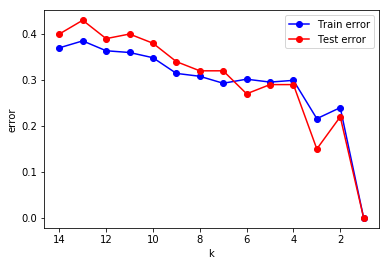

In [18]:
plt.plot(neighbours, dataDict['train']['error'], '-ob', label="Train error")
plt.plot(neighbours, dataDict['test']['error'], '-or', label="Test error")
plt.xlabel('k')
plt.ylabel('error')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

Видно, что при k=3 ошибка на тестовой выборке получилась сильно меньше ошибки на тренировочной выборке. В принципе, данное значение k скорее исключение из правила, но тем не менее оно дает наилучший результат как для тренировочной, так и для тестовой выборок (не считая k=1, но это уже переобучение). Определим ошибку при значении k=3.

In [19]:
k_best = 3
print("Train error (k=3): "+str(dataDict['train']['error'][k_best-1]))
print("Test error (k=3): "+str(dataDict['test']['error'][k_best-1]))

Train error (k=3): 0.2159090909090909
Test error (k=3): 0.15


Вывод: для данной задачи удалось получить верное предсказание на тестовой выборке методом ближайших соседей в 85% случаев.

Применим PCA для тренировочных данных, число главных компонент = 2.

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)   

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Выведем главные компоненты, собственные значения вдоль каждой компоненты, соостветствующие сингулярные значения.

In [21]:
print(pca.components_)
print(pca.explained_variance_)
print(pca.singular_values_)

[[ 7.07106768e-01  7.07106768e-01  8.33258192e-05  2.88607360e-05
   1.58189015e-05  6.50328142e-05  1.02737803e-05 -7.53065945e-05
  -3.59332435e-05  1.02600814e-04  1.07604850e-05 -4.64921804e-05
  -6.68691190e-05 -2.03851663e-05 -3.39051195e-06  2.94889856e-05]
 [ 9.17776161e-05  9.17776161e-05 -5.70817672e-01 -4.46398450e-02
   4.15926733e-02  1.37422411e-01 -7.14295958e-03 -1.30279452e-01
   3.66741637e-02 -5.24899168e-01  9.48747713e-03  1.42239671e-03
   5.13989294e-01  1.54657248e-01  8.95979076e-02 -2.47887103e-01]]
[1.04676004e+05 4.94232537e-01]
[9099.38015129   19.77215054]


Видим, что число обусловленности получается очень большим. Следовательно, возможно, что некоторые признаки могут в той или иной степени зависеть друг от друга. В дальнейшем будет иметь смысл их убрать из рассмотрения.

Построим тренировочные данные в новом базисе. Изобразим синим цветом точки на плоскости, соответствующие выжившим людям, а красным - не выжившим. Можно видеть, что просматривается некоторая зависимость относительно второй главной компоненты.

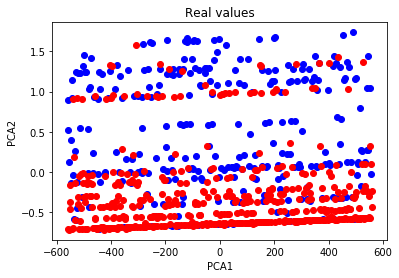

In [22]:
X_train_pca = pca.transform(X_train)

X_survived = [X_train_pca[i] for i in range(len(X_train_pca)) if y_train[i] == 1]
X_not_survived = [X_train_pca[i] for i in range(len(X_train_pca)) if y_train[i] == 0]

plt.plot([el[0] for el in X_survived], [el[1] for el in X_survived], 'ob')
plt.plot([el[0] for el in X_not_survived], [el[1] for el in X_not_survived], 'or')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Real values')
plt.show()

Применим к новым данным классификатор ближайших соседей с k=k_best=3. Вычислим ошибку. Видно, что ошибка на тренировочной выборке стала больше примерно на 0.012.

In [23]:
knn = KNeighborsClassifier(n_neighbors = k_best)
knn.fit(X_train_pca, y_train)
y_train_predict = knn.predict(X_train_pca)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.22727272727272727


Построим то же самое, только уже для предсказания. Зависимость вдоль второй компоненты просматривается хуже.

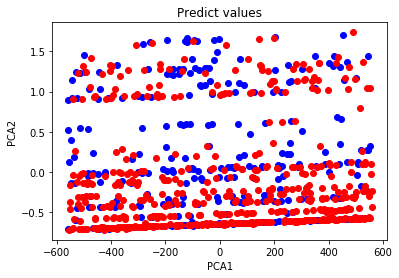

In [24]:
X_predict_survived = [X_train_pca[i] for i in range(len(X_train_pca)) if y_train_predict[i] == 1]
X_predict_not_survived = [X_train_pca[i] for i in range(len(X_train_pca)) if y_train_predict[i] == 0]

plt.plot([el[0] for el in X_predict_survived], [el[1] for el in X_predict_survived], 'ob')
plt.plot([el[0] for el in X_predict_not_survived], [el[1] for el in X_predict_not_survived], 'or')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Predict values')
plt.show()

Без применения PCA метод ближайших соседей дал на тестовой выборке меньшую ошибку, чем на тренировочной. Проверим, будет ли так после понижения размерности.

In [25]:
pca = PCA(n_components=2)
pca.fit(X_test)
X_test_pca = pca.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = k_best)
knn.fit(X_test_pca, y_test)
y_test_predict = knn.predict(X_test_pca)
err_test = np.mean(y_test != y_test_predict)
print(err_test)


0.15


Ошибка на тестовой выборке после понижения размерности осталась такой же. Построим точки на плоскости (звездочками обозначим предсказание). Видно, что модель в большинстве случаев верно предсказала результат.

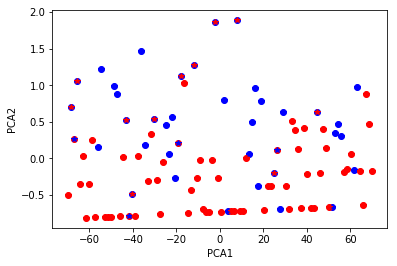

In [26]:
X_survived = [X_test_pca[i] for i in range(len(X_test_pca)) if y_test[i] == 1]
X_not_survived = [X_test_pca[i] for i in range(len(X_test_pca)) if y_test[i] == 0]
X_predict_survived = [X_test_pca[i] for i in range(len(X_test_pca)) if y_test_predict[i] == 1]
X_predict_not_survived = [X_test_pca[i] for i in range(len(X_test_pca)) if y_test_predict[i] == 0]

plt.plot([el[0] for el in X_survived], [el[1] for el in X_survived], 'ob')
plt.plot([el[0] for el in X_not_survived], [el[1] for el in X_not_survived], 'or')
plt.plot([el[0] for el in X_predict_survived], [el[1] for el in X_predict_survived], '*b')
plt.plot([el[0] for el in X_predict_not_survived], [el[1] for el in X_predict_not_survived], '*r')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Исследуем ошибку в зависимости от числа главных компонент.

In [27]:
dataDict = {'train':(X_train, y_train), 'test':(X_test, y_test)}
components = [n for n in range(2, 16+1)]

def computeErrorPCA(k):
    error = {'train':[], 'test':[]}
    
    for n in components:
        for key in dataDict:
            X = dataDict[key][0]
            y = dataDict[key][1]
            
            pca = PCA(n_components=n)
            pca.fit(X)   
            X_pca = pca.transform(X)
            
            knn = KNeighborsClassifier(n_neighbors = k)
            knn.fit(X_pca, y)
            y_predict = knn.predict(X_pca)
            
            error[key].append(np.mean(y != y_predict))
    return error
            
error = computeErrorPCA(k_best)

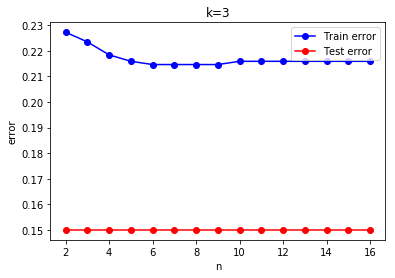

In [28]:
plt.plot(components, error['train'], '-ob', label="Train error")
plt.plot(components, error['test'], '-or', label="Test error")
plt.xlabel('n')
plt.ylabel('error')
plt.title('k=3')
plt.legend()
plt.show()

Можно видеть, что на тренировочной выборке ошибка уменьшается, пока число компонент не достигает 6, а при числе компонент больше 10 увеличивается. В точке минимума ошибка немного меньше, чем была без использования PCA (т.е. при n=16).

На тестовой же выборке ошибка постоянна. Возможно, дело в том, что число ближайших соседей = 3 представляет из себя на тестовой выборке особый удачный случай. Попробуем взять k=4.

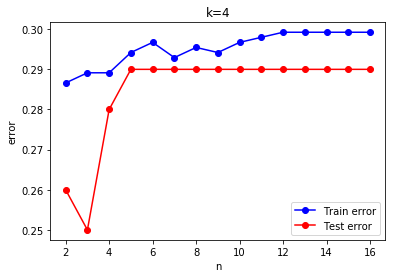

In [29]:
error = computeErrorPCA(4)

plt.plot(components, error['train'], '-ob', label="Train error")
plt.plot(components, error['test'], '-or', label="Test error")
plt.xlabel('n')
plt.ylabel('error')
plt.title('k=4')
plt.legend()
plt.show()

Картина изменилась, теперь если на тренировочной выборке оптимальное число компонент 2, то на тестовой 3. При n>=5 ошибка на тестовой выборке достигает своего максимума 0.29.

Вывод: метод главных компонент позволил немного уменьшить ошибку на тренирововчной выборке при числе компонент от 6 до 9. На тестовой выборке ошибка осталась прежней.